## Predict heart disease using machine learning

This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine learing model capbale of predictiong weather or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem defination 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

> Give clinical statement of a patient, can we predict weather or not they have heart disease?


## 2. Data

The original data came from Cleavland data from Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version available on Kaggle:
https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

## 3.Evaluation

> If we can reach 95% accuracy prediction weather or not a patient has heart disease during the proof of concept, we will presue the project.

## Features

** Create data dictionary **
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

In [2]:
# Import all the tool we need

# Regular EDA (Exploratory data analysis) tool

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, cols)

(303, 14)

## Data exploration (EDA, exploratory data analysis)

The goal here is to find out more about the data and becomes a subject matter expert on the dataset you are working with.

1. What questions are you trying to solve?
2. What kind of data do we have? and how do we treat different data types
3. What's missing from the data, and how do you deal with it
4. Where are the outliners and why should you care about them?
5. How can you add, change or remove the features to get more out your data?


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Let's find out how many of each class there?
df["target"].value_counts() # 1 = yes, 0 = no; df.target.value_counts() also works

1    165
0    138
Name: target, dtype: int64

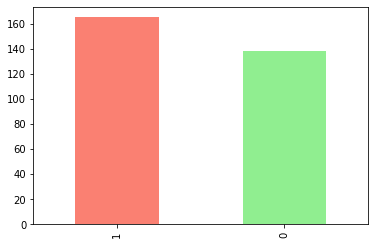

In [11]:
df['target'].value_counts().plot(kind = 'bar', color = ["salmon", "lightgreen"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# check missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
# Compared target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


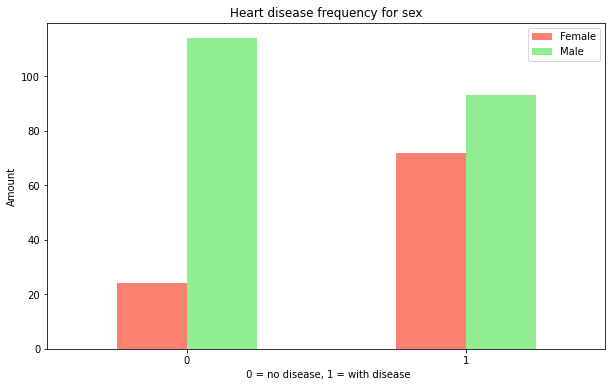

In [4]:
# Create a plot of the crosstab

pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                   color = ["salmon", "lightgreen"],
                                   figsize = (10, 6))

plt.title("Heart disease frequency for sex")
plt.xlabel(" 0 = no disease, 1 = with disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0); # keep the label on x-axis vertical

In [27]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## Age & max heart rate for heart disease

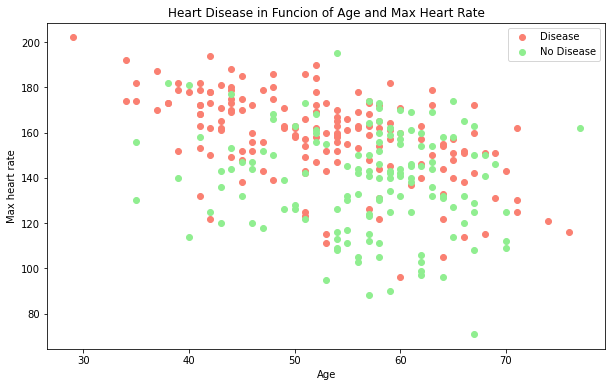

In [35]:
# Create another figure
plt.figure(figsize =(10,6))

# Scatter with positive example
plt.scatter(df.age[df.target ==1],
            df.thalach[df.target ==1],
           c = "salmon")

# Scatter with negtive example
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
           c = "lightgreen");

plt.title("Heart Disease in Funcion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"]);

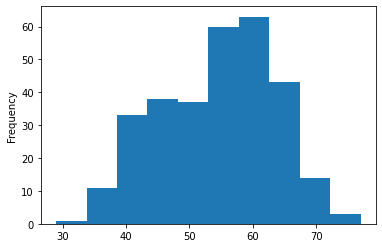

In [37]:
# check the age distribution with a histogram
df.age.plot.hist();

## Heart disease frequency per chest pain type

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [38]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


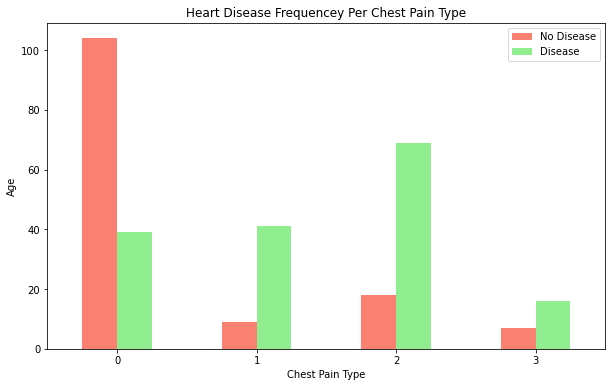

In [42]:
# visitualize the c"rosstab

pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize = (10,6),
                                 color = ["salmon", "lightgreen"])
plt.title("Heart Disease Frequencey Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Age")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [3]:
# Let's make correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

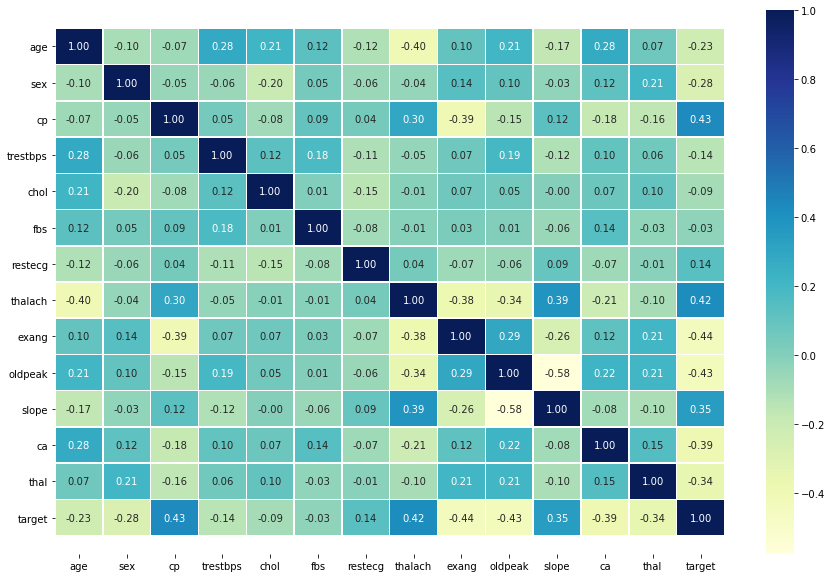

In [12]:
# Correlation matrix in a prettier version

cor_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(cor_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap= "YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)

## 5.Modelling

In [5]:
# Split data into X and Y

X = df.drop("target", axis =1)
Y = df["target"]

# Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

It's time to build models and test data! We are going to try 3 different models:
1. Logistic Regression
2. K-neighbors Neighbours Classifier
3. Random Forest Classifier

In [6]:
# Put models in the dictionary
models ={"Logisitc Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models:
def fit_and_score(models,X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models
    X_train: training data (no lables)
    X_test: testing data (no labels)
    Y_train: training data (no labels)
    Y_test: testing data (no labels)
    """
    # Set the raindom seed
    np.random.seed(42)
    model_scores ={}
    
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [7]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             Y_train = Y_train,
                             Y_test = Y_test)
model_scores

/home/yasuei/Desktop/sample_project1/project_heart_diease/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitc Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

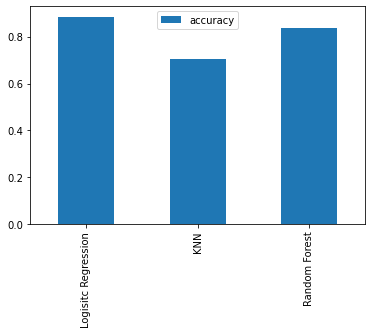

In [11]:
model_compare = pd.DataFrame(model_scores, index =["accuracy"])
model_compare.T.plot.bar();# T referes to the text label of each score

The baseline model is done, let's make some compared models.

What to check?
* Hyperparameter tuning
* Feature imports
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* Roc curve
* Area under the curve (AUC)

## Hyperparameter  tuning( google words: hyperparameter KNN tuning)

In [25]:
# Let's tune KNN

np.random.seed(42)

train_scores = []
test_scores = []

# Create a list of different value for n_neighbors
neighbors = range(1, 21)

# Set up KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    
    # update the test score list
    test_scores.append(knn.score(X_test, Y_test))

In [26]:
train_scores

[1.0,
 0.78099173553719,
 0.7520661157024794,
 0.731404958677686,
 0.7231404958677686,
 0.7024793388429752,
 0.71900826446281,
 0.7231404958677686,
 0.6983471074380165,
 0.6776859504132231,
 0.7148760330578512,
 0.7148760330578512,
 0.6983471074380165,
 0.6900826446280992,
 0.7024793388429752,
 0.6942148760330579,
 0.6900826446280992,
 0.7066115702479339,
 0.7107438016528925,
 0.6983471074380165]

In [27]:
test_scores

[0.639344262295082,
 0.7049180327868853,
 0.639344262295082,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.639344262295082,
 0.6885245901639344,
 0.6229508196721312,
 0.6229508196721312]

Maximum KNN score on the test data: 70.49%


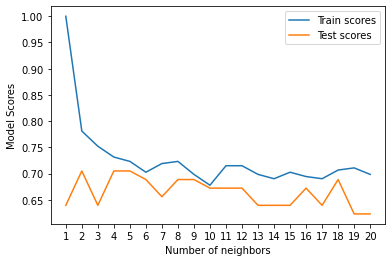

In [28]:
plt.plot(neighbors, train_scores, label = "Train scores")
plt.plot(neighbors, test_scores, label = "Test scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores");
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomSearchCV

We are going to tune:

* LogiscticRegression()
* RandomForestClassifier()

using RandomSearchCV

In [43]:
# Create a hyperparameter grid for LogisitcRegression()
log_reg_grid = {"C":np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

Let's tune the models with RandomizedSearchCV

In [53]:
# Tune LogisitcRegression()

np.random.seed(42)

# Split data into X and Y

X = df.drop("target", axis =1)
Y = df["target"]

# Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Set up hyperparameter search for LogisticRegression
rs_log_re = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv =5,
                               n_iter = 20,
                               verbose = True)
# Fit the random hyperparameter search model for LogisticRegression
rs_log_re.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [54]:
rs_log_re.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [55]:
rs_log_re.score(X_test, Y_test)

0.8852459016393442

Now let's tune RandomForestClassifier

In [56]:
# Split data into X and Y

X = df.drop("target", axis =1)
Y = df["target"]

# Split the data into train and test set（with or without this part in the same cell, the result would be differnt)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

np.random.seed(42)

# Set up a random hyperparameter search for Random Forest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv =5,
                           n_iter = 20,
                           verbose = True)

# Fit the model
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [58]:
rs_rf.score(X_test, Y_test)

0.819672131147541

## Hyperparameter tuning with GridSearchCV

Since LogisitcRegression provdes so far, we will try to improve them with GridSearchCV

In [72]:
# Different hyperparameters for our LogisticRegression model 

log_rg_grid ={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_rg_grid, # not param_distributions 
                         cv = 5,
                         verbose = True)
X = df.drop("target", axis =1)
Y = df["target"]

# Split the data into train and test set（with or without this part in the same cell, the result would be differnt)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

np.random.seed(42)

# Fit the model

gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [74]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [75]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall 
* F1-score

... and it would be great if cross-validation can be used where possible
To make comparion and our evluate our train model, first we need to make predicition

In [76]:
# Make precition with tuned model
Y_preds = gs_log_reg.predict(X_test)

In [77]:
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

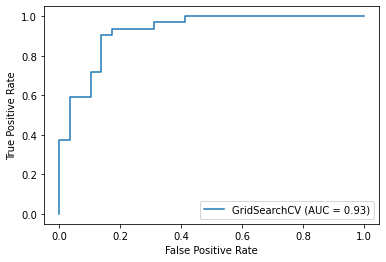

In [79]:
# Plot ROC curve and caculate and acaulate AUC metric
plot_roc_curve(gs_log_reg, X_test, Y_test)

In [80]:
# Confusion metrix
print(confusion_matrix(Y_test, Y_preds))

[[25  4]
 [ 3 29]]


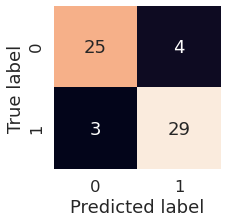

In [83]:
sns.set(font_scale = 1.5)

def plot_conf_mat(Y_test, Y_preds):
    '''
    Plot a nice looking confusion metrix using Seanborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot =True,
                     cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(Y_test,Y_preds)

Let's get classification report, as well as cross-validated precision, recall and f1-score

In [84]:
print(classification_report(Y_test, Y_preds))

# Precision: it is about how precise the predcition is: precision for 0 : 
#    true postive 0/ all predicted postive (true postive + false postive)

# Recall : it is about the portion of postive has been correctly classified : recall for 0
# true positive(0) / all true (positive true + negative false) 

# F1-score: 2* (precision* recall)/ (precision + recall)

# If the numbers of each class (negative/ postive) are not balanced, you have to balanced the numbers, then pay attten 
# to macro avg

# Weight avg is the f1 socres that take the numbers of each class into account, 
# it will in favor ot the majority class

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Caculate evaluation metrics using cross-validation 

We are going to caculate precision, recall, f1-score of our model using cross-validation and to do so we will use 
cross_val_score()

In [87]:
# check the best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [92]:
# Creat a new classifier with best params

clf = LogisticRegression(C=0.20433597178569418, 
                         solver ='liblinear')

In [95]:
# cross_validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [96]:
# cross_validated precision
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [98]:
# cross_validated recall
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [100]:
# cross_validated f1_score
cv_f1 = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

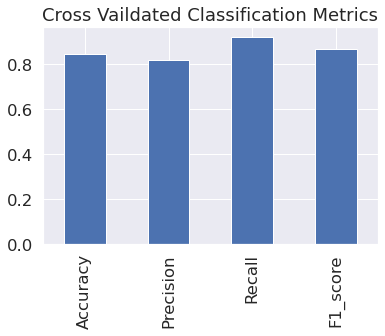

In [102]:
# visitualize cross-validation metric

cv_metric = pd.DataFrame ({"Accuracy":cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1_score":cv_f1},
                          index = [0])
cv_metric.T.plot.bar(title = "Cross Vaildated Classification Metrics",
                     legend = False);
    


## Feature importance

Meaning: which feature contributed the most to the outcomes of the model, and how did they contribute ?

Finding feature importance is different in each machine learning model. One way to find feature importance, is to search for "(Model name) feature importance"

In [103]:
# Fit an instance of LogisitcRegression()

clf = LogisticRegression(C=0.20433597178569418, 
                         solver ='liblinear')

clf.fit(X_train, Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [104]:
# check coef_
clf.coef_

array([[ 0.00316727, -0.86044603,  0.66067062, -0.01156993, -0.00166374,
         0.04386123,  0.31275806,  0.02459361, -0.60413051, -0.56862836,
         0.4505162 , -0.63609874, -0.67663373]])

In [105]:
# Match coef's of the features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672745878422548,
 'sex': -0.8604460277489853,
 'cp': 0.6606706204232194,
 'trestbps': -0.0115699312361741,
 'chol': -0.0016637424277075145,
 'fbs': 0.043861226926811506,
 'restecg': 0.3127580602524802,
 'thalach': 0.024593609804263287,
 'exang': -0.604130511211879,
 'oldpeak': -0.5686283603311223,
 'slope': 0.45051619778258994,
 'ca': -0.6360987392548547,
 'thal': -0.6766337305157835}

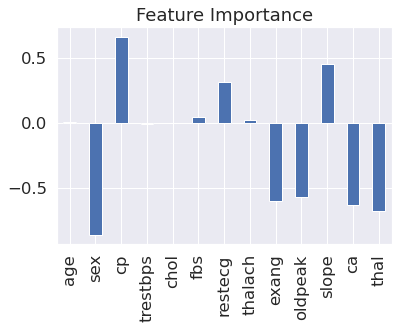

In [106]:
# Visualize feature importance

feature_df =pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);